<a href="https://colab.research.google.com/github/iynk-solar/1st-paper/blob/main/First_paper__ANN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
#from keras.optimizers import  RMSprop, Adam, SGD
from keras.optimizers import  rmsprop_v2,adam_v2
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import timeit


In [ ]:
from google.colab import files
uploaded = files.upload()  # needs to load s1, s1_without_zeros, s2 ,....

Saving s44.csv to s44.csv


In [ ]:
dts = pd.read_csv('s44.csv')  # s1_without_zeros.csv
#dts = pd.read_csv('s44_without_zeros.csv') 
dts.head(3)

,Irradi Glob,BoMT2,Wind Dir,Irradi PA,Pressure,BoMT,AVG irradi,Rainfall,Humidity,Amp Temp,S4INV4
0,0,15.5,139,0,1009,16.2,0,3481.8,87,17.1,0.0
1,0,15.7,126,0,1009,16.3,0,3481.8,86,17.0,0.0
2,0,15.9,120,0,1009,16.4,0,3481.8,86,17.2,0.0


In [ ]:
dts.dtypes

Irradi  Glob      int64
BoMT2           float64
Wind Dir          int64
Irradi PA         int64
Pressure          int64
BoMT            float64
AVG irradi        int64
Rainfall        float64
Humidity          int64
Amp Temp        float64
S4INV4          float64
dtype: object

In [ ]:
X_lbl = dts.iloc[:, :-1] # input columns with lables 

In [ ]:
X = dts.iloc[0:10000, :-1].values
y = dts.iloc[0:10000, -1].values
print(X.shape, y.shape)
y = np.reshape(y, (-1,1))
y.shape

(10000, 10) (10000,)


(10000, 1)

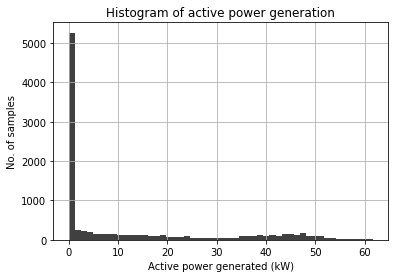

In [ ]:
# the histogram of the data
n, bins, patches = plt.hist(y, 50, density=False, facecolor='black', alpha=0.75)
plt.xlabel('Active power generated (kW)')
plt.ylabel('No. of samples')
plt.title('Histogram of active power generation')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

# ***Splitting Training and Test sets***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (7500, 10) (7500, 1) 
Test Shape: (2500, 10) (2500, 1)


# ***Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
# input scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# outcome scaling:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)    
y_test = sc_y.transform(y_test)

# ***Creating Neural Network***

In [ ]:
def create_spfnet(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    
    if i==0:
      model.add(Dense(nodes, kernel_initializer=kernels, activation=n_activation, input_dim=X_train.shape[1]))
      #model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes, activation=n_activation, kernel_initializer=kernels))
      #model.add(Dropout(0.3))
  
  model.add(Dense(1))
  model.compile(loss='mse', 
                optimizer='adam',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model


In [ ]:
spfnet = create_spfnet([18, 6], 'relu', 'normal')
spfnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                198       
                                                                 
 dense_1 (Dense)             (None, 6)                 114       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 319
Trainable params: 319
Non-trainable params: 0
_________________________________________________________________


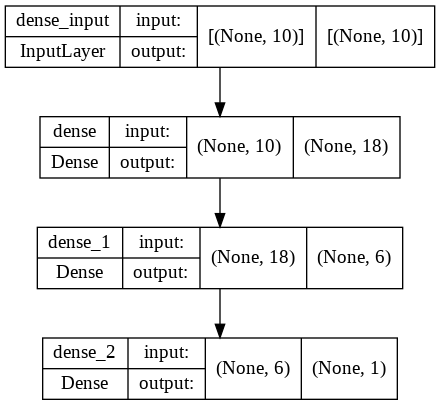

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(spfnet, to_file='spfnet_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
import timeit
start = timeit.default_timer()
hist = spfnet.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=150, verbose=2)
end = timeit.default_timer()
print(end-start)

Epoch 1/200
235/235 - 1s - loss: 0.7068 - root_mean_squared_error: 0.8407 - val_loss: 0.6362 - val_root_mean_squared_error: 0.7976 - 1s/epoch - 5ms/step
Epoch 2/200
235/235 - 0s - loss: 0.5032 - root_mean_squared_error: 0.7094 - val_loss: 0.4934 - val_root_mean_squared_error: 0.7024 - 444ms/epoch - 2ms/step
Epoch 3/200
235/235 - 0s - loss: 0.3915 - root_mean_squared_error: 0.6257 - val_loss: 0.3902 - val_root_mean_squared_error: 0.6247 - 391ms/epoch - 2ms/step
Epoch 4/200
235/235 - 0s - loss: 0.3078 - root_mean_squared_error: 0.5548 - val_loss: 0.3104 - val_root_mean_squared_error: 0.5571 - 439ms/epoch - 2ms/step
Epoch 5/200
235/235 - 0s - loss: 0.2435 - root_mean_squared_error: 0.4934 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996 - 456ms/epoch - 2ms/step
Epoch 6/200
235/235 - 0s - loss: 0.1942 - root_mean_squared_error: 0.4407 - val_loss: 0.2025 - val_root_mean_squared_error: 0.4500 - 375ms/epoch - 2ms/step
Epoch 7/200
235/235 - 0s - loss: 0.1576 - root_mean_squared_error: 

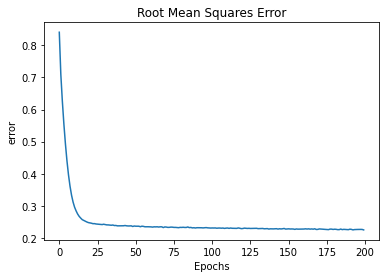

In [ ]:

plt.plot(hist.history['root_mean_squared_error'])
#plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root Mean Squares Error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

In [ ]:
spfnet.evaluate(X_train, y_train)


235/235 [==============================] - 0s 1ms/step - loss: 0.0508 - root_mean_squared_error: 0.2254


[0.05080259591341019, 0.22539430856704712]

In [ ]:
 
rt1=0
itn=50
for i in range(itn):
  start2 = timeit.default_timer()
  y_pred = spfnet.predict(X_test) # get model predictions (scaled inputs here)
  end2 = timeit.default_timer()
  rt1=rt1+ (end2-start2)
  i
Results=rt1/itn
Results

 
 


0.16046422511999991

In [ ]:
from sklearn.metrics import mean_squared_error



y_pred_orig = sc_y.inverse_transform(y_pred) # unscale the predictions
y_test_orig = sc_y.inverse_transform(y_test) # unscale the true test outcomes

RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

4.355040265565321

In [ ]:
train_pred = spfnet.predict(X_train) # get model predictions (scaled inputs here)
train_pred_orig = sc_y.inverse_transform(train_pred) # unscale the predictions
y_train_orig = sc_y.inverse_transform(y_train) # unscale the true train outcomes

mean_squared_error(train_pred_orig, y_train_orig, squared=False)

3.871290509346447

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.9343066381540257

In [ ]:
r2_score(train_pred_orig, y_train_orig)

0.9456621229078623

In [ ]:
np.concatenate((train_pred_orig, y_train_orig), 1)


array([[ 1.70243907,  1.11      ],
       [29.38104248, 33.46      ],
       [-0.58204955,  0.        ],
       ...,
       [ 1.1509912 ,  0.        ],
       [ 1.04759669,  0.        ],
       [ 0.82490712,  0.        ]])

In [ ]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[ 0.68401891,  0.        ],
       [43.80212021, 43.39      ],
       [ 0.26126459,  0.        ],
       ...,
       [ 0.39711931,  0.        ],
       [10.33969879, 10.31      ],
       [ 5.6062789 ,  3.78      ]])

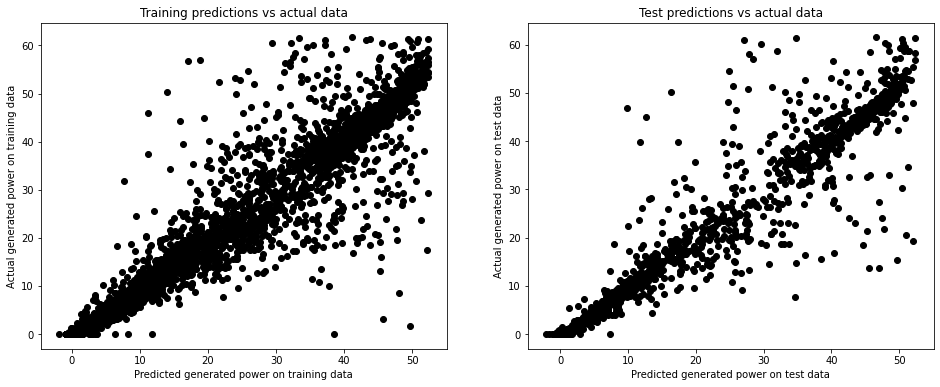

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig,color="black")
plt.xlabel('Predicted generated power on test data')
plt.ylabel('Actual generated power on test data')
plt.title('Test predictions vs actual data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig,color="black")
plt.xlabel('Predicted generated power on training data')
plt.ylabel('Actual generated power on training data')
plt.title('Training predictions vs actual data')
plt.show()

In [ ]:
y_pred_orig.min()

-2.0331013

In [ ]:
results = np.concatenate((y_test_orig, y_pred_orig), 1)
mresults=results
results = pd.DataFrame(data=results)
results.columns = ['Real Solar Power Produced', 'Predicted Solar Power']
#results = results.sort_values(by=['Real Solar Power Produced'])
pd.options.display.float_format = "{:,.2f}".format
#results[800:820]
results[200:207]

,Real Solar Power Produced,Predicted Solar Power
200,0.00,0.60
201,0.93,1.57
202,19.69,17.05
203,0.00,1.14
204,1.19,1.76
205,0.00,0.62
206,36.32,31.39


In [ ]:
sc = StandardScaler()
pred_whole = spfnet.predict(sc.fit_transform(X))
pred_whole_orig = sc_y.inverse_transform(pred_whole)
pred_whole_orig

array([[0.6014069 ],
       [0.6401251 ],
       [0.7147272 ],
       ...,
       [0.23979452],
       [0.32063368],
       [0.3448713 ]], dtype=float32)

In [ ]:
df_results = pd.DataFrame.from_dict({
    'R2 Score of Whole Data Frame': r2_score(pred_whole_orig, y),
    'R2 Score of Training Set': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Test Set': r2_score(y_pred_orig, y_test_orig),
    'Mean of Test Set': np.mean(y_pred_orig),
    'Standard Deviation pf Test Set': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
},orient='index', columns=['Value'])
display(df_results.style.background_gradient(cmap='afmhot', axis=0))

,Value
R2 Score of Whole Data Frame,0.942374
R2 Score of Training Set,0.945662
R2 Score of Test Set,0.934307
Mean of Test Set,12.704811
Standard Deviation pf Test Set,16.991488
Relative Standard Deviation,1.337406


In [ ]:
y_test

array([[-0.6910274 ],
       [ 1.83522585],
       [-0.6910274 ],
       ...,
       [-0.6910274 ],
       [-0.09075842],
       [-0.47094818]])

In [ ]:
y_pred

array([[-0.65120244],
       [ 1.8592204 ],
       [-0.67581606],
       ...,
       [-0.6679063 ],
       [-0.08902931],
       [-0.36461854]], dtype=float32)

In [ ]:
y_test=y_test_orig
y_pred =y_pred_orig


ym =np.max(y_test)
#per1=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  #  10%-20%, 20%-30% ,.... , 90%-100%
per1=np.array([0, 0.2,  0.4,  0.6, 0.8, 1])
#per1=np.array([0, 1]) # 0-100%




from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

for i, pv in enumerate(per1):

  #print(i, per1.size)

  if i != (per1.size-1):
   # print(per1[i], per1[i+1])

    ym1=ym*per1[i]
    ym2=ym*per1[i+1] 

    loc1=np.where((y_test >= ym1) & (y_test <= ym2) )
    
 
    yt_test=y_test[loc1]
    yt_pred=y_pred[loc1]

   
   # r2=r2_score(yt_pred, yt_test)

   # r2=r2_score(y_pred, y_test)
    rmse = mean_squared_error(yt_test, yt_pred, squared=False)
    #print(r2, rmse)

    print(rmse)





1.4027142134093156
7.918518576388756
6.521327047142575
5.345428099119268
10.309510730079566


In [ ]:
y_test=y_test_orig
y_pred =y_pred_orig


n_zeros = np.count_nonzero(y_test==0)
# display the count of zeros
print(n_zeros)
#print(y_test.size)
print('---------------------')

D=abs(y_pred-y_test)/y_test


y0_l = np.where(y_test==0)  
y_pred_z= y_pred [y0_l]
y_test_z= y_test [y0_l]

Dz=abs(y_pred_z-y_test_z)
df = pd.DataFrame(Dz)
df.to_csv('Dz.csv')





print(np.count_nonzero(y_pred_z==0))
print(y_test_z)


t1=np.count_nonzero(np.isinf(D))
t2=np.count_nonzero(np.isnan(D))
t3=t1+t2
print(t2)
print('---------------------')


n_l = np.where(np.isnan(D))   # Make zero by zero into  D=0;
D[n_l]=0




i_l = np.where(np.isinf(D))   # Dividing by zer oadjustment
D[i_l]=2*abs(y_pred[i_l])/(y_test[i_l] + y_pred[i_l])

print(D)
print('-------------')





D1=np.sort(D, axis=None)

#print(D1)

ld=D1.size

# per1=np.array([0.05, 0.1, 0.15, 0.2, 0.25,  0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1 ])
#per1= np.linspace(2, 100,50)/100
per1= np.linspace(10, 100,10)/100

print(per1)
#D1 = np.array(D1)

ploc=ld*per1-1
ploc=ploc.astype(int)
print(ploc)

closeness=D1[ploc]

#closeness= np.take(D1, ploc)



print(closeness)



i50=round(ld*0.5)
i75=round(ld*0.75)
i90=round(ld*0.90)

d50=D1[i50-1]
d75=D1[i75-1]
d90=D1[i90-1]

c2=[ d90 ]


df = pd.DataFrame(closeness)
df.to_csv('closeness.csv')


1140
---------------------
0
[0. 0. 0. ... 0. 0. 0.]
0
---------------------
[[2.        ]
 [0.00949805]
 [2.        ]
 ...
 [2.        ]
 [0.00288058]
 [0.48314257]]
-------------
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 249  499  749  999 1249 1499 1749 1999 2249 2499]
[9.61692641e-03 4.14433318e-02 9.39776702e-02 2.05046969e-01
 5.21243193e-01 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 7.89788296e+01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [ ]:

y_test=y_test_orig
y_pred =y_pred_orig

D=abs(y_pred-y_test)
D1=np.sort(D, axis=None)

#print(D1)

ld=D1.size

# per1=np.array([0.05, 0.1, 0.15, 0.2, 0.25,  0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1 ])
#per1= np.linspace(2, 100,50)/100
per1= np.linspace(10, 100,10)/100


#D1 = np.array(D1)

ploc=ld*per1-1
ploc=ploc.astype(int)
print(ploc)

ae=D1[ploc]

#closeness= np.take(D1, ploc)



print(ae)



i50=round(ld*0.5)
i75=round(ld*0.75)
i90=round(ld*0.90)

d50=D1[i50-1]
d75=D1[i75-1]
d90=D1[i90-1]

c2=[ d90 ]


df = pd.DataFrame(ae)
df.to_csv('AE.csv')


[ 249  499  749  999 1249 1499 1749 1999 2249 2499]
[ 0.19855806  0.32875422  0.4556021   0.59559982  0.71871549  0.84858795
  1.11626605  1.92011971  4.38246964 37.00981647]
